<a href="https://colab.research.google.com/github/CodewithTanzeel/Loan-Approval-Prediction/blob/main/Loan_Approval_PredictionApp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm

In [109]:
df = pd.read_csv('/content/loan_approval_dataset.csv')

In [110]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [111]:
df.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [112]:
df.isnull()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,False,False,False,False,False,False,False,False,False,False,False,False,False
4265,False,False,False,False,False,False,False,False,False,False,False,False,False
4266,False,False,False,False,False,False,False,False,False,False,False,False,False
4267,False,False,False,False,False,False,False,False,False,False,False,False,False


In [113]:
df.shape

(4269, 13)

In [114]:
# statistical measures from the the data set
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [115]:
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [116]:
# Remove any leading/trailing spaces in the column values
df["loan_status"] = df["loan_status"].str.strip()

# Replace string labels with numeric values
df["loan_status"] = df["loan_status"].replace({"Approved": 1, "Rejected": 0})

# Confirm replacement
print(df["loan_status"].unique())

[1 0]


/tmp/ipython-input-4256804929.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["loan_status"] = df["loan_status"].replace({"Approved": 1, "Rejected": 0})


In [117]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [118]:
print(df["loan_status"].unique())


[1 0]


In [119]:
df[" no_of_dependents"].value_counts()

,count
no_of_dependents,
4,752
3,727
0,712
2,708
1,697
5,673


In [120]:
# Replace "3+" with 4
df[" no_of_dependents"] = df[" no_of_dependents"].replace("3+", 4)

In [121]:
df[" no_of_dependents"].value_counts()

,count
no_of_dependents,
4,752
3,727
0,712
2,708
1,697
5,673


<Axes: xlabel=' education', ylabel='count'>

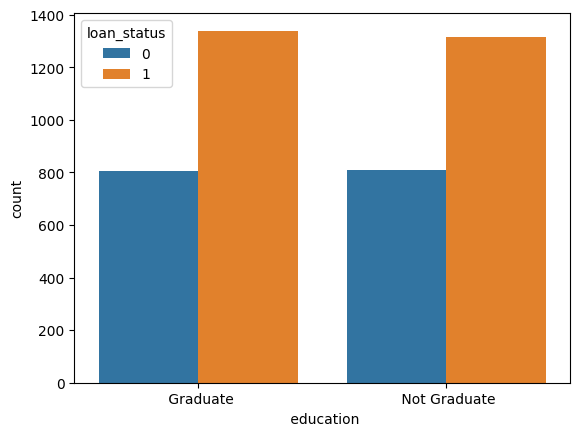

In [122]:
# Data Visualization
sns.countplot(x=" education",hue="loan_status",data=df)

In [128]:
sns.countplot(x=" education",hue="loan_status",data=df)

ValueError: Could not interpret value ` education` for `x`. An entry with this name does not appear in `data`.

In [129]:
# Strip spaces from column names
df.columns = df.columns.str.strip()

# Strip spaces from values
df["self_employed"] = df["self_employed"].str.strip()
df["education"] = df["education"].str.strip()

# Replace categorical values with numeric
df["self_employed"] = df["self_employed"].replace({"Yes": 1, "No": 0})
df["education"] = df["education"].replace({"Graduate": 1, "Not Graduate": 0})

# Verify
print(df[["self_employed", "education"]].head())


AttributeError: Can only use .str accessor with string values!

In [130]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [132]:
# Seperating Data and Label
X = df.drop(columns=['loan_id','loan_status'],axis=1)
Y = df['loan_status']

In [133]:
print(X)
print(Y)

      no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                    2          1              0       9600000     29900000   
1                    0          0              1       4100000     12200000   
2                    3          1              0       9100000     29700000   
3                    3          1              0       8200000     30700000   
4                    5          0              1       9800000     24200000   
...                ...        ...            ...           ...          ...   
4264                 5          1              1       1000000      2300000   
4265                 0          0              1       3300000     11300000   
4266                 2          0              0       6500000     23900000   
4267                 1          0              0       4100000     12800000   
4268                 1          1              0       9200000     29700000   

      loan_term  cibil_score  residential_assets_va

In [134]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [135]:
print(X.shape,X_train.shape,X_test.shape)

(4269, 11) (3842, 11) (427, 11)


Traning the model

In [ ]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train,Y_train)